Importing libs

In [1]:
import pandas as pd
from io import StringIO
import io
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder

Importing ds

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BograFlood.csv to BograFlood.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['BograFlood.csv']))

Processing data

In [4]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)
encoder=LabelEncoder()
df['Sl']=encoder.fit_transform(df['Sl'])

Visualizing the data

In [5]:
print(df)

      Sl  Year  Month  Max_Temp  Min_Temp    Rainfall  Relative_Humidity  \
0      0  1948      1      25.8      11.7    8.140625          74.218750   
1      1  1948      2      33.3      13.3   11.140625          66.531250   
2      2  1948      3      38.3      17.4   25.312500          61.812500   
3      3  1948      4      39.5      22.7   69.140625          66.203125   
4      4  1948      5      36.1      23.1  179.890625          76.859375   
..   ...   ...    ...       ...       ...         ...                ...   
787  787  2013      8      35.8      26.5  256.000000          86.000000   
788  788  2013      9      36.3      26.5   99.000000          81.000000   
789  789  2013     10      35.5      23.8  200.000000          83.000000   
790  790  2013     11      32.3      17.4    0.000000          74.000000   
791  791  2013     12      30.5      14.1    0.000000          79.000000   

     Wind_Speed  Cloud_Coverage  Bright_Sunshine   Period  Flood?  
0      0.875926    

LSTM Net

In [8]:
X_columns=[x for x in df.columns if x!='Flood?']
features=len(X_columns)
model = Sequential()
model.add(LSTM(20, activation='tanh', return_sequences=True, input_shape=(1, features)))
model.add(LSTM(9, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
history=model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 20)             2560      
                                                                 
 lstm_3 (LSTM)               (None, 9)                 1080      
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,650
Trainable params: 3,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
grouped=df.groupby('Sl')

In [16]:
for group in grouped:
    df_batch=pd.DataFrame(columns=['Sl','Year','Month','Max_Temp','Min_Temp','Rainfall','Relative_Humidity','Wind_Speed','Cloud_Coverage','Bright_Sunshine','Period','Flood?'])
    for Sl in group:
        filter=df['Sl']==Sl
        for key,item in df[filter].dropna().iterrows():
            df_batch=df_batch.append({'Sl':item['Sl'],'Year':item['Year'],'Month':item['Month'],'Max_Temp':item['Max_Temp'],'Min_Temp':item['Min_Temp'],'Rainfall':item['Rainfall'],'Relative_Humidity':item['Relative_Humidity'],'Wind_Speed':item['Wind_Speed'],'Cloud_Coverage':item['Cloud_Coverage'],'Bright_Sunshine':item['Bright_Sunshine'],'Period':item['Period'],'Flood?':item['Flood?']},ignore_index=True)
    X=df_batch[X_columns]
    X = np.asarray(X).astype(np.float32)
    X = np.resize(X,(X.shape[0],1,X.shape[1]))
    y=df_batch['Flood?']
    y = np.asarray(y).astype(np.float32)
    print("\n",X)
    hist = model.fit(X,y,batch_size=len(X),epochs=10)


 [[[0.0000000e+00 1.9480000e+03 1.0000000e+00 2.5799999e+01 1.1700000e+01
   8.1406250e+00 7.4218750e+01 8.7592590e-01 1.1000000e+00 7.2962265e+00
   1.9480100e+03]]]
Epoch 1/10
1/1 [==============================] - 0s 14ms/step - loss: 11.6712 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 13ms/step - loss: 8.0858 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 5.1794 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 1.3239e-06 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 1.3239e-06 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 9ms/step - loss: 1.3239e-06 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 1.3239e-06 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - ETA: 0s - loss: 1.3239e-06 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


Streaming output truncated to the last 5000 lines.
Epoch 7/10
1/1 [==============================] - 0s 8ms/step - loss: 7.7729e-09 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 15ms/step - loss: 7.7727e-09 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 7.7725e-09 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 15ms/step - loss: 7.7723e-09 - accuracy: 1.0000

 [[[5.82000e+02 1.99600e+03 7.00000e+00 3.52000e+01 2.65000e+01
   3.38000e+02 8.60000e+01 1.40000e+00 6.50000e+00 3.70000e+00
   1.99607e+03]]]
Epoch 1/10
1/1 [==============================] - 0s 14ms/step - loss: 18.6669 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 4.1600e-07 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 18ms/step - loss: 2.3721e-07 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 18ms/step - loss: 2.3721e-07 - accuracy: 1

In [17]:
import tensorflow as tf

In [18]:
new_bin_cross_entropy = tf.keras.losses.BinaryCrossentropy()
result = new_bin_cross_entropy(X,y).numpy()
print(result)

6954.8574


Text(89.18, 0.5, 'Actual label')

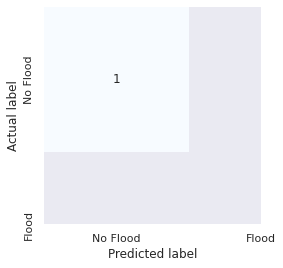

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
y_predicted = model.predict(X) > 0.5
mat = confusion_matrix(y, y_predicted)
labels = ['No Flood', 'Flood']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')